# Pretty cornerplots
Uses multiple plotting utilities to demo all of the options. Here I will display two posteriors, both trained using the same priors; one trained using the generative option for SBI, one trained using the pre-generated training set.

In [1]:
from scripts import evaluate, io, plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# remove top and right axis from plots
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False

In [2]:
# load up the generative model
modelloader = io.ModelLoader()
path = "../savedmodels/sbi/"
model_name = "sbi_linear_generative"
posterior_generative = modelloader.load_model_pkl(path, model_name)

../savedmodels/sbi/


In [3]:
# load up the generative model
modelloader = io.ModelLoader()
path = "../savedmodels/sbi/"
model_name = "sbi_linear_from_data"
posterior_static = modelloader.load_model_pkl(path, model_name)

../savedmodels/sbi/


In order to evaluate these, we need a validation set, which we'll load below.

In [4]:
dataloader = io.DataLoader()
path = "../saveddata/"
data_name = "data_validation"
validation = dataloader.load_data_pkl(data_name, path)
theta_true = validation['thetas'][0]
y_true = validation['xs'][0]

../saveddata/


Visualize the validation data.

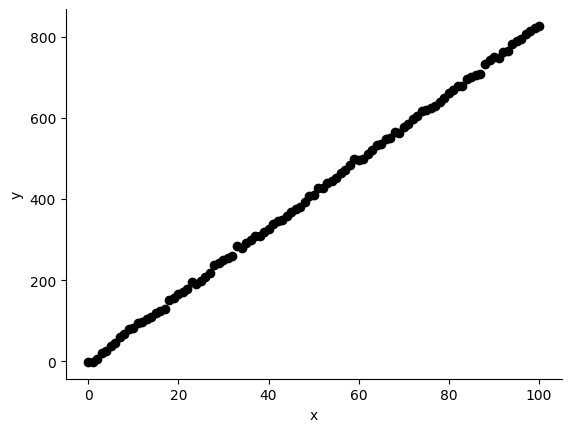

In [5]:
x = np.linspace(0, 100, 101)
plt.clf()
plt.scatter(x, y_true, color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Let's draw from the posterior and display the results in a pairplot from mackelab. First for the static results.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

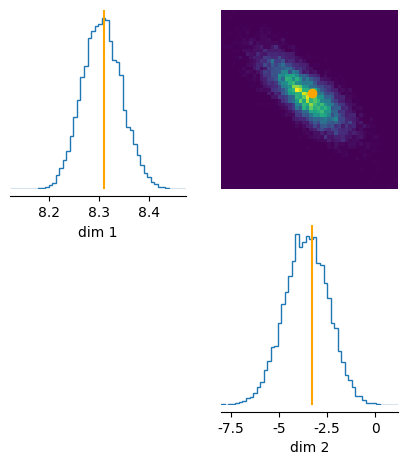

In [6]:
display = plot.Display()
posterior_samples = posterior_static.sample((10000,), x = y_true)
display.mackelab_corner_plot(posterior_samples,
                             labels_list = ['$m$','$b$'],
                             truth_list = theta_true,
                             truth_color = 'orange')

Now for the generative model.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

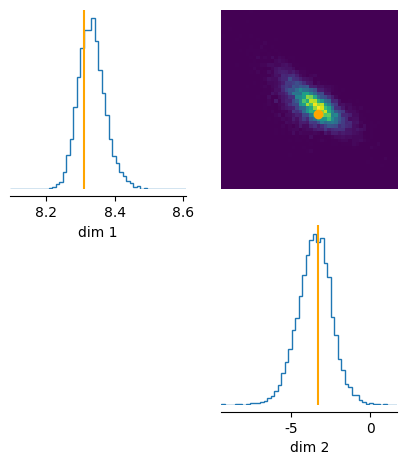

In [7]:
display = plot.Display()
posterior_samples = posterior_generative.sample((10000,), x = y_true)
display.mackelab_corner_plot(posterior_samples,
                             labels_list = ['$m$','$b$'],
                             truth_list = theta_true,
                             truth_color = 'orange')